# Mini-Projeto: Reconhecimento de Dígitos

---

**Aluno(s):**  *Felipe Siqueira Gontijo* e *Mariana da Silva Martins*

---

## Redução da dimensão das amostras

Diminuindo a complexidade dos dados de entrada e sintetizando os dados das imagens em apenas duas infromações de (p=2): a **intensidade** e a **simetria** da imagem. imagem.

### Importando Bibliotecas

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D

### Dados Fornecidos - Reconhecendo o Dataset

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      0       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      0       0       0       0       0       0       0       0       0   
3      0       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

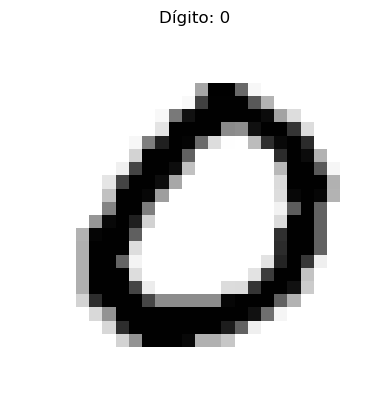

In [44]:
train_df = pd.read_csv('train.csv', delimiter=";")
print(train_df.head())

#Separando as labels
labels = train_df['label']
images = train_df.drop(columns='label').values

#formato dos dados
print(f"Formato dos labels: {labels.shape}")
print(f"Formato das imagens: {images.shape}")

#Exibir a imagem
def plot_digit(image_data, label):
    plt.imshow(image_data.reshape(28, 28), cmap='binary')
    plt.title(f'Dígito: {label}')
    plt.axis('off')
    plt.show()

plot_digit(images[0], labels[0])

---
###  Processamento de Dados para Classificação de Dígitos

Realizamos o processamento de dados para a classificação de dígitos, calculando características importantes e salvando os resultados em novos arquivos CSV.

#### 1. Cálculo das Características

- **Intensidade**: Calcula a soma total dos valores dos pixels, normalizada por 255.
- **Simetria**: Avalia a simetria vertical e horizontal dos dígitos. A simetria vertical é calculada comparando a imagem com a sua versão espelhada verticalmente, e a simetria horizontal é calculada comparando a imagem com a sua versão espelhada horizontalmente.

A **Intensidade** de uma imagem pode ser calculada pela equação:
$$
I = \frac{\sum_{x=0}^{783} pixel_x}{255}
$$


In [45]:
def calc_intensidade(pixels):
    return pixels.sum() / 255

A **Simetria** de uma imagem pode ser calculada pela equação:
$$
S_v = \frac{\sum_{i=0}^{27} \sum_{j=0}^{13} \left| pix_{i,j} - pix_{i,27-j} \right|}{255}
$$


In [46]:
def calc_simetria(pixels):
    
    matriz = pixels.reshape(28, 28)
    
    simetria_vertical = sum(sum(abs(matriz[i, j] - matriz[i, 27 - j]) for j in range(14))for i in range(28))/255 #percorre as linhas dividindo pela metade e subtraindo, o processo é repetido em todas as linhas
    simetria_horizontal = sum(sum(abs(matriz[i, j] - matriz[27 - i, j]) for j in range(28))for i in range(14))/255 #percorre as colunas dividindo pela metade superior e inferior  

    simetria = (simetria_vertical + simetria_horizontal)
    return simetria

#### 2. Processamento dos Dados

- **Função `processar_dados`**: 
  - Lê o dataset de entrada (CSV).
  - Calcula as características de intensidade e simetria para cada dígito.
  - Cria um novo DataFrame com as características calculadas.
  - Salva o DataFrame resultante em um arquivo CSV.

In [47]:
def processar_dados(caminho_entrada, caminho_saida):
    
    df = pd.read_csv(caminho_entrada, delimiter=';')
    
    labels = []
    intensidades = []
    simetrias = []
    
    #Para cada linha do dataset
    for i, row in df.iterrows():
        label = row['label']
        pixels = row.drop('label').values.astype(float)
        
        intensidade = calc_intensidade(pixels)
        simetria = calc_simetria(pixels)
        
        labels.append(label)
        intensidades.append(intensidade)
        simetrias.append(simetria)
    
    #criando o dataset reduzido
    df_reduzido = pd.DataFrame({
        'label': labels,
        'intensidade': intensidades,
        'simetria': simetrias
    })
    
    # Salva o novo DataFrame em um arquivo CSV
    df_reduzido.to_csv(caminho_saida, index=False, sep=';')

# gerando os arquivos reduzidos
processar_dados('train.csv', 'train_redu.csv')
processar_dados('test.csv', 'test_redu.csv')

### Exibindo os resultados dos arquivos reduzidos

*' train_redu.cs'*v e*' test_redu.cs'*  contém 3 as seguintes colunas: label 
intensidade e simetria

In [49]:
#primeiros resultados arq de treino
df_train_redu = pd.read_csv('train_redu.csv', delimiter=';')
print("Primeiras linhas do arquivo train_redu.csv:")
print(df_train_redu.head())

#primeiros resultados arq de teste
df_test_redu = pd.read_csv('test_redu.csv', delimiter=';')
print("\nPrimeiras linhas do arquivo test_redu.csv:")
print(df_test_redu.head())

Primeiras linhas do arquivo train_redu.csv:
   label  intensidade    simetria
0      0   145.435294  148.572549
1      0   118.576471  137.113725
2      0   127.600000  134.047059
3      0   138.047059  151.003922
4      0   146.215686  122.501961

Primeiras linhas do arquivo test_redu.csv:
   label  intensidade    simetria
0      0   147.933333  130.470588
1      0   131.054902  122.721569
2      0   134.890196  151.725490
3      0   139.976471  133.921569
4      0   129.580392  130.274510


### Separando Train1x5 e Test1x5 

Realizar um filtro nos dados dos arquivos train_redu.csv e test_redu.csv, deixando 
apenas as imagens com valores 1 ou 5 na coluna label, construindo as instância *
train1*x5 *e test1*x5;

In [50]:
train1x5 = df_train_redu[(df_train_redu['label'] == 1) | (df_train_redu['label'] == 5)]
test1x5 = df_test_redu[(df_test_redu['label'] == 1) | (df_test_redu['label'] == 5)]

print(f"train1x5: {train1x5}")

train1x5:       label  intensidade    simetria
425       1    44.701961   69.270588
426       1    59.850980   83.443137
427       1    48.552941   79.043137
428       1    69.435294   72.878431
429       1    51.541176   84.611765
...     ...          ...         ...
2181      5   105.686275  133.890196
2182      5   113.050980  116.698039
2183      5   110.725490  133.019608
2184      5    99.305882  132.133333
2185      5   101.172549  141.364706

[1184 rows x 3 columns]


### Plotando os graficos dos digitos 1 e 5

Plotar os dados de train1x5 em um gráfico de duas dimensões (intensidade X 
simetria) como ilustrado na Figura 4. Dados com 𝑙𝑎𝑏𝑒𝑙 = 1 plotar de azul e dado 
com 𝑙𝑎𝑏𝑒𝑙 = 5 plotar de vermelho;

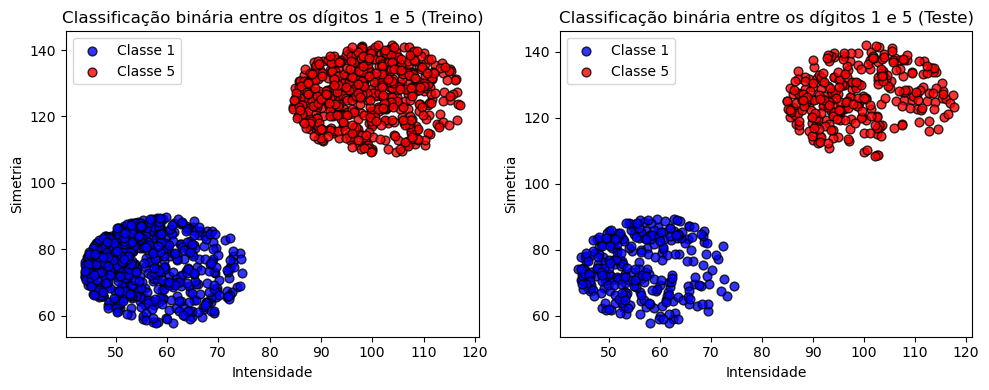

In [51]:
# Separar as classes no conjunto de treino
train1 = train1x5[train1x5['label'] == 1]
train5 = train1x5[train1x5['label'] == 5]

# Separar as classes no conjunto de teste
test1 = test1x5[test1x5['label'] == 1]
test5 = test1x5[test1x5['label'] == 5]

# Plot dos dados de treino
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)  # Gráfico à esquerda
plt.scatter(train1['intensidade'], train1['simetria'], color='blue', edgecolor='k', s=40, alpha=0.8, label='Classe 1')
plt.scatter(train5['intensidade'], train5['simetria'], color='red', edgecolor='k', s=40, alpha=0.8, label='Classe 5')
plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Classificação binária entre os dígitos 1 e 5 (Treino)')
plt.legend()

# Plot dos dados de teste
plt.subplot(1, 2, 2)  # Gráfico à direita
plt.scatter(test1['intensidade'], test1['simetria'], color='blue', edgecolor='k', s=40, alpha=0.8, label='Classe 1')
plt.scatter(test5['intensidade'], test5['simetria'], color='red', edgecolor='k', s=40, alpha=0.8, label='Classe 5')
plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Classificação binária entre os dígitos 1 e 5 (Teste)')
plt.legend()

# Mostrar ambos os gráficos
plt.tight_layout()
plt.show()

In [52]:
#Aqui so estou conferindo se os valores estao certos e equilibrados
print("distribuição das Classes no Treinamento:")
print(train1x5['label'].value_counts())

print("\nDistribuição das Classes no Teste:")
print(test1x5['label'].value_counts())

distribuição das Classes no Treinamento:
label
1    608
5    576
Name: count, dtype: int64

Distribuição das Classes no Teste:
label
1    292
5    291
Name: count, dtype: int64


---
# Classificação dos dígitos 1x5;

## Criando X_treino, X_teste, Y_treino e Y_teste

### Dados de Treinamento

- **Características (`X_train`)**: Seleciona as colunas `intensidade` e `simetria` do DataFrame `train1x5`.
- **Rótulos (`y_train`)**: Converte os rótulos para valores binários, onde o dígito `1` é mantido como `1` e `5` são convertidos para `-1`.

### Dados de Teste

- **Características (`X_test`)**: Seleciona as colunas `intensidade` e `simetria` do DataFrame `test1x5`.
- **Rótulos (`y_test`)**: Converte os rótulos para valores binários, onde o dígito `1` é mantido como `1` e `5` são convertidos para `-1`.

In [53]:
# Separar os dados de treino e teste
X_train = train1x5[['intensidade', 'simetria']].values
y_train = train1x5['label'].apply(lambda x: 1 if x == 1 else -1).values

X_test = test1x5[['intensidade', 'simetria']].values
y_test = test1x5['label'].apply(lambda x: 1 if x == 1 else -1).values

## Análise da distribuição dos dados
   - O estudo da distribuição dos dados se faz necessário para que possamos entender a organização do nosso conjunto e aplicar métodos que podem nos ajudar no desempenho dos algoritmos 

### Distribuição Normal

- **Se os dados são normalmente distribuídos (`p_value > 0.05`), a padronização é recomendada.**
  - **Por quê?** A padronização (ou z-score normalization) é apropriada para dados que seguem uma distribuição normal, pois transforma os dados para ter uma média de 0 e um desvio padrão de 1.

### Não Distribuição Normal ou Desvio Padrão Pequeno

- **Se os dados não são normalmente distribuídos (`p_value <= 0.05`) ou têm um desvio padrão pequeno (`std_dev < 1.0`), a normalização é recomendada.**
  - **Por quê?** A normalização (ou min-max scaling) é adequada para dados que não seguem uma distribuição normal ou têm uma variação pequena, pois transforma os dados para um intervalo fixo (por exemplo, 0 a 1).


In [54]:
from scipy.stats import shapiro

def verificar_distribuicao(X, dataset_nome):
    colunas = ['intensidade', 'simetria']
    for i, coluna in enumerate(colunas):
        stat, p_value = shapiro(X[:, i])
        std_dev = np.std(X[:, i])

        print(f"\nDataset {dataset_nome} - Coluna: {coluna}")
        print(f"Estatística Shapiro-Wilk: {stat}, p-value: {p_value}")
        print(f"Desvio padrão: {std_dev}")
        
        if p_value > 0.05:
            print("Distribuição normal")
            print("---Aconselhável padronizar os dados---")
        else:
            print("Não é uma distribuição normal")
            print("---Aconselhável normalizar os dados---")

        if std_dev < 1.0:
            print("Desvio padrão pequeno")
            print("---Aconselhável normalizar os dados---")

# Aplicar a função nos dados de treino e teste
verificar_distribuicao(X_train, "Treino")
verificar_distribuicao(X_test, "Teste")


Dataset Treino - Coluna: intensidade
Estatística Shapiro-Wilk: 0.8866841793060303, p-value: 1.3944876318268067e-28
Desvio padrão: 22.95985944213296
Não é uma distribuição normal
---Aconselhável normalizar os dados---

Dataset Treino - Coluna: simetria
Estatística Shapiro-Wilk: 0.8705641031265259, p-value: 3.307569893157295e-30
Desvio padrão: 26.837052584601185
Não é uma distribuição normal
---Aconselhável normalizar os dados---

Dataset Teste - Coluna: intensidade
Estatística Shapiro-Wilk: 0.89290851354599, p-value: 1.0256585938790346e-19
Desvio padrão: 22.838524620944813
Não é uma distribuição normal
---Aconselhável normalizar os dados---

Dataset Teste - Coluna: simetria
Estatística Shapiro-Wilk: 0.866845428943634, p-value: 7.301036167484707e-22
Desvio padrão: 26.992566221651273
Não é uma distribuição normal
---Aconselhável normalizar os dados---


## Treinar os três classificadores com os dados de train1x5 e Testa-los com test1x5.

- Gerar a matriz de confusão e os relatórios de eficácia de classificação de cada 
classificador.

### Função para Plotar a Fronteira de Decisão

A função `plot_decision_boundary` visualiza a fronteira de decisão do Perceptron:

- **Plotagem dos Dados**: Os dados são plotados em um gráfico de dispersão, coloridos de acordo com suas classes.
- **Desenho da Fronteira de Decisão**: Calcula e plota a linha de decisão baseada nos pesos aprendidos.
- **Configuração do Gráfico**: Ajusta os eixos, títulos e legenda, e adiciona uma barra de cores para mostrar as classes preditas.

In [55]:
def plot_decision_boundary(X, y_true, y_pred, weights, title, xlabel, ylabel, color_ticks, color_label, xlim=None, ylim=None):
    plt.figure(figsize=(8, 6))
    
    # Plotar dados, usando y_true para a coloração
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap=plt.cm.RdYlBu, edgecolor='k', s=40, alpha=0.8)
    
    # Adicionar a reta de decisão usando os pesos
    x_values = np.linspace(X[:, 0].min()-5, X[:, 0].max()+5, 100)
    y_values = - (weights[1] * x_values + weights[0]) / weights[2]
    plt.plot(x_values, y_values, 'k--', label='f(x)')
    
    # Destaque pontos onde y_pred difere de y_true (erros)
    misclassified = y_true != y_pred
    plt.scatter(X[misclassified, 0], X[misclassified, 1], facecolors='none', edgecolors='r', s=100, label='Erros')
    
    # Definir limites para os eixos se fornecidos
    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.colorbar(scatter, ticks=color_ticks, label=color_label)
    plt.legend()
    plt.show()

## ➞ Perceptron

### 1. Função de Construção da Lista de Pontos Classificados Incorretamente

A função `constroiListaPCI` é responsável por identificar quais pontos no conjunto de dados são classificados incorretamente pelo modelo atual do Perceptron. Ela realiza as seguintes etapas:

- **Cálculo das Predições**: Utiliza o produto escalar entre os dados com o bias (`x_bias`) e os pesos (`w`) para gerar as predições.
- **Identificação dos Erros**: Compara as predições com os rótulos verdadeiros (`y`) e cria uma lista de índices onde as predições não correspondem aos rótulos.

In [56]:
# Função de construção da lista de pontos classificados incorretamente
def constroiListaPCI(x_bias, y, w):
    predictions = np.sign(np.dot(x_bias, w))  # produto escalar
    l = [i for i in range(len(y)) if predictions[i] != y[i]]  # índices dos pontos incorretos
    return l

### 2. Algoritmo de Aprendizagem do Perceptron (PLA)

A função `PLA` implementa o algoritmo do Perceptron para treinar o modelo. O processo é o seguinte:

- **Preparação dos Dados**: Adiciona um termo de bias aos dados e inicializa os pesos com zeros.
- **Iterações de Treinamento**: Em cada iteração, a função `constroiListaPCI` é usada para encontrar os pontos classificados incorretamente. Se não houver erros, o treinamento é concluído.
- **Atualização dos Pesos**: Seleciona um ponto de erro aleatoriamente e ajusta os pesos de acordo com o erro encontrado.
- **Critério de Parada**: O loop termina quando todos os pontos são classificados corretamente ou quando o número máximo de iterações (`max_iter`) é atingido.

### 3. Função de Classificação

A função `classify` usa o modelo treinado para fazer previsões sobre novos dados. Adiciona o bias aos dados e calcula a predição usando o produto escalar com os pesos.

In [57]:
# Algoritmo de Aprendizagem do Perceptron
def PLA(X, y, max_iter=50000):
    x_bias = np.c_[np.ones(X.shape[0]), X]  # Adiciona o bias
    w = np.zeros(x_bias.shape[1])  # Inicializa pesos
    it = 0
    
    while True:
        l = constroiListaPCI(x_bias, y, w)
        
        if len(l) == 0:  # Se não houver mais pontos incorretamente classificados
            print(f"Solução encontrada após {it} iterações.")
            break
        
        idx = np.random.choice(l)  # Escolhe um ponto incorretamente classificado aleatoriamente
        x_i = x_bias[idx]
        y_i = y[idx]
        w += y_i * x_i  # Atualiza os pesos
        it += 1
    
        if it == max_iter:
            print("Limite máximo de iterações atingido.")
            break
    
    return it, w
    
def classify(X, w):
    x_bias = np.c_[np.ones(X.shape[0]), X]  # Adiciona o bias
    return np.sign(np.dot(x_bias, w))

### 4. Treinamento e Avaliação do Modelo

- **Treinamento**: O Perceptron é treinado usando o conjunto de dados `X_train` e `y_train`.
- **Predição**: O modelo é usado para prever as classes dos dados de teste `X_test`.
- **Avaliação**: Calcula a matriz de confusão e o relatório de classificação para avaliar o desempenho do modelo.

### 5. Resultados

- **Quantidade de Iterações**: Exibe o número de iterações necessárias para encontrar uma solução.
- **Pesos do Perceptron**: Mostra os pesos finais após o treinamento.
- **Matriz de Confusão e Relatório de Classificação**: Apresenta métricas de desempenho para análise detalhada.

In [58]:
# Treinar o Perceptron
it, w = PLA(X_train, y_train)
y_pred = classify(X_test, w)

# Avaliar o desempenho
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=['Classe 5', 'Classe 1'])

# Exibir informações
print(f"Quantidade de iterações: {it}")
print(f"Pesos do Perceptron: {w}")
print(f"\nMatriz de Confusão (Teste):\n {conf_matrix}")
print(f"\nRelatório de Classificação (Teste):\n{class_report}")

Solução encontrada após 19841 iterações.
Quantidade de iterações: 19841
Pesos do Perceptron: [5197.          -75.55686275    9.38039216]

Matriz de Confusão (Teste):
 [[291   0]
 [  0 292]]

Relatório de Classificação (Teste):
              precision    recall  f1-score   support

    Classe 5       1.00      1.00      1.00       291
    Classe 1       1.00      1.00      1.00       292

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583



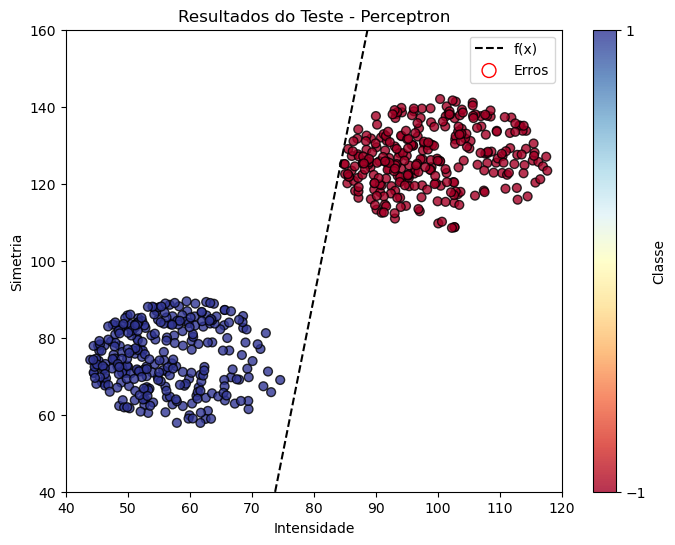

In [59]:
# Plotar a fronteira de decisão para dados de teste
plot_decision_boundary(X_test, y_test, y_pred, w, 
                       title="Resultados do Teste - Perceptron", 
                       xlabel="Intensidade", 
                       ylabel="Simetria", 
                       color_ticks=[-1, 1], 
                       color_label="Classe",
                       xlim=(40, 120), 
                       ylim=(40, 160))

## ➞ LinearRegression

### 1. Classe LinearRegression

A classe `LinearRegression` é uma implementação simples de regressão linear. Ela inclui três métodos principais:

### 1.1 Método `fit`

O método `fit` é responsável pelo treinamento do modelo. Ele realiza as seguintes etapas:

- **Adição do Termo de Bias**: Adiciona uma coluna de uns aos dados de entrada `X` para incorporar o termo de bias no modelo.
- **Cálculo dos Pesos**: Utiliza a equação normal para calcular os pesos do modelo. A equação é dada por:

  $$
  \mathbf{w} = (X_b^T X_b)^{-1} X_b^T y
  $$

  onde $X_b$ é a matriz dos dados com o bias incluído, e $y$ são os rótulos.

### 1.2 Método `predict`

O método `predict` faz previsões com base nos dados de entrada `X`:

- **Adição do Termo de Bias**: Adiciona uma coluna de uns aos dados de entrada `X`, semelhante ao que foi feito no método `fit`.
- **Cálculo das Predições**: Calcula as predições usando os pesos aprendidos:

  $$
  \hat{y} = X_b \cdot \mathbf{w}
  $$

  onde $X_b$ é a matriz dos dados com o bias e $\mathbf{w}$ são os pesos.

### 1.3 Método `getW`

O método `getW` retorna os pesos do modelo que foram aprendidos durante o treinamento. Isso permite verificar quais valores foram ajustados pelo modelo.

In [60]:
class LinearRegression:
    def fit(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # bias
        y = np.array(y)
        self.w = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    
    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # bias
        return X_b.dot(self.w)
    
    def getW(self):
        return self.w

### 2. Treinamento e Avaliação do Modelo

- **Criação e Treinamento do Modelo**: Uma instância da classe `LinearRegression` é criada e treinada usando o método `fit` com o conjunto de dados `X_train` e `y_train`.
- **Fazendo Previsões**: Após o treinamento, o método `predict` é usado para gerar previsões sobre o conjunto de dados de teste `X_test`.
- **Conversão das Previsões**: As previsões contínuas são convertidas em categorias binárias usando uma limitação (se a previsão for maior que 0, a classe é 1; caso contrário, é -1).
- **Avaliação do Desempenho**: Calcula a matriz de confusão e o relatório de classificação para avaliar a precisão do modelo.

In [61]:
lr = LinearRegression()
lr.fit(X_train, y_train)

# Fazer previsões
predictions = lr.predict(X_test)
y_pred_lr = np.where(predictions > 0, 1, -1)  # Convertendo previsões contínuas em categorias

# Avaliar o desempenho
conf_matrix = confusion_matrix(y_test, y_pred_lr)
class_report = classification_report(y_test, y_pred_lr, target_names=['5', '1'])

print(f"\nMatriz de Confusão (Teste):\n {conf_matrix}")
print(f"\nRelatório de Classificação (Teste):\n{class_report}")


Matriz de Confusão (Teste):
 [[291   0]
 [  0 292]]

Relatório de Classificação (Teste):
              precision    recall  f1-score   support

           5       1.00      1.00      1.00       291
           1       1.00      1.00      1.00       292

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583



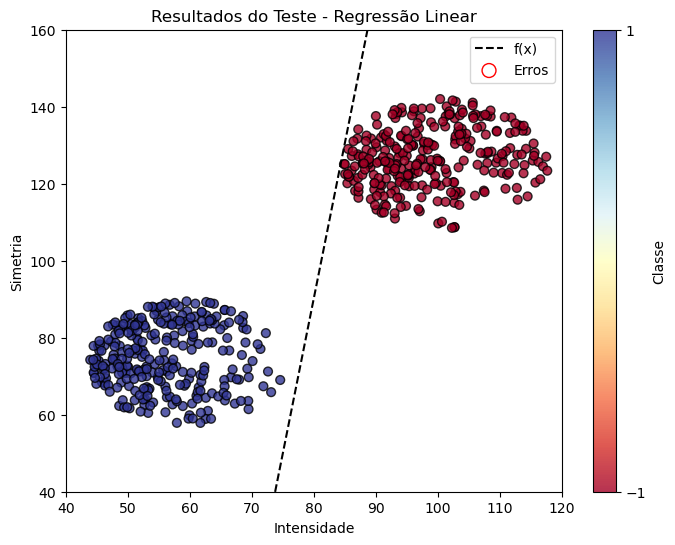

In [62]:
# Plotar resultados do teste
plot_decision_boundary(X_test, y_test, y_pred_lr, w, 
                       title="Resultados do Teste - Regressão Linear", 
                       xlabel="Intensidade", 
                       ylabel="Simetria", 
                       color_ticks=[-1, 1], 
                       color_label="Classe",
                       xlim=(40, 120), 
                       ylim=(40, 160))

## ➞ Regressão Logística

### 1. Normalização dos Dados

Antes de ajustar o modelo de regressão logística, os dados são normalizados. A normalização é feita subtraindo a média e dividindo pelo desvio padrão de cada característica. Isso é feito para garantir que todas as características tenham a mesma escala e contribuir igualmente para o modelo.

A fórmula para a normalização é:

$$
X_{\text{norm}} = \frac{X - \text{mean}(X)}{\text{std}(X)}
$$

onde $\text{mean}(X)$ é a média das características e $\text{std}(X)$ é o desvio padrão.

In [63]:
'''Na atividade pratica tambem normaliza os dados'''
import numpy.linalg as LA

def normalizar_manual(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std

X_train_norm = normalizar_manual(X_train)
X_test_norm = normalizar_manual(X_test)

# Adicionar o termo de bias
X_test_bias = np.c_[np.ones((X_test_norm.shape[0], 1)), X_test_norm]

### 2. Classe `LogisticRegression`

A classe `LogisticRegression_` implementa um modelo de regressão logística. Aqui está uma visão geral dos métodos e cálculos envolvidos:

#### 2.1 Método `fit`

O método `fit` ajusta o modelo aos dados usando gradiente descendente. Durante o treinamento, o modelo ajusta os pesos para minimizar a função de custo.

A atualização dos pesos é dada por:

$$
\mathbf{w} \leftarrow \mathbf{w} - \eta \cdot \nabla J(\mathbf{w})
$$

onde $\eta$ é a taxa de aprendizado e $\nabla J(\mathbf{w})$ é o gradiente da função de custo.

O gradiente é calculado como:

$$
\nabla J(\mathbf{w}) = -\frac{1}{N} X^T (y - \text{probs})
$$

onde $\text{probs}$ são as probabilidades previstas, calculadas pela função sigmoide:

$$
\text{probs} = \frac{1}{1 + e^{-z}}
$$

e $z$ é o produto escalar entre os dados e os pesos.

#### 2.2 Método `predict_prob`

Este método calcula as probabilidades associadas a cada amostra usando a função sigmoide. A fórmula para calcular a probabilidade é:

$$
\text{probs} = \frac{1}{1 + e^{-z}}
$$

onde $z$ é o produto escalar entre os dados e os pesos.

#### 2.3 Método `predict`

O método `predict` converte as probabilidades em classes binárias. A classificação é feita da seguinte maneira:

$$
\text{y}_{\text{pred}} = \begin{cases}
1 & \text{se } \text{probs} \geq 0.5 \\
-1 & \text{caso contrário}
\end{cases}
$$

#### 2.4 Método `getW`

Este método retorna os pesos do modelo ajustado, que são os coeficientes que definem a fronteira de decisão.

#### 2.5 Método `getRegressionY`

Este método calcula a linha de decisão da regressão logística. A fórmula para a linha de decisão é:

$$
y = \frac{-\mathbf{w}_0 + \text{shift} - \mathbf{w}_1 \cdot X}{\mathbf{w}_2}
$$

onde $\mathbf{w}_0$, $\mathbf{w}_1$, e $\mathbf{w}_2$ são os pesos do modelo e $\text{shift}$ é um valor opcional para ajustar a linha.

In [64]:
# Definição da classe LogisticRegression_ conforme fornecido anteriormente
class LogisticRegression:
    def __init__(self, eta=0.001, tmax=1500, epsilon=1e-5):
        self.eta = eta
        self.tmax = tmax
        self.epsilon = epsilon
        self.w = None

    def fit(self, _X, _y):
        
        X = np.c_[np.ones((_X.shape[0], 1)), _X]
        y = np.array(_y)
        N, d = X.shape

        # Inicializa w com zeros
        self.w = np.zeros(X.shape[1])
        
        for t in range(self.tmax):
            # Calcula as probabilidades usando a função sigmoide
            z = np.dot(X, self.w)
            probs = 1 / (1 + np.exp(-z))

            # Calcula o gradiente
            errors = y - probs
            gradient = -np.dot(X.T, errors) / N

            # Atualiza os pesos
            self.w -= self.eta * gradient

            # Verifica a convergência
            if LA.norm(gradient) < self.epsilon:
                break

    def predict_prob(self, X):
        X = np.array(X)
        z = np.dot(X, self.w)
        probs = 1 / (1 + np.exp(-z))
        return probs

    def predict(self, X):
        probs = self.predict_prob(X)
        return (probs >= 0.5).astype(int) * 2 - 1

    def getW(self):
        return self.w

    def getRegressionY(self, regressionX, shift=0):
        if self.w is None or len(self.w) != 3:
            raise ValueError("O modelo não está ajustado ou não tem 3 coeficientes.")
        return (-self.w[0] + shift - self.w[1] * regressionX) / self.w[2]

## 3. Treinamento e Avaliação

- **Treinamento do Modelo**: O modelo é ajustado usando o método `fit` com os dados normalizados.
- **Predições**: As previsões são feitas no conjunto de dados de teste usando o método `predict`.

### 3.1 Avaliação

A matriz de confusão e o relatório de classificação são utilizados para avaliar o desempenho do modelo. A matriz de confusão compara as previsões com os rótulos verdadeiros, e o relatório de classificação fornece métricas detalhadas como precisão, recall e F1-score para cada classe.

In [65]:
# Executa o ajuste dos dados com Regressão Logística
rlog = LogisticRegression(eta=0.001, tmax=1500) #Diminui a eta (taxa de aprendizado) pois estava dando overfitting e por isso tava classificando errado
rlog.fit(X_train_norm, y_train)

# Predições para o conjunto de teste
y_pred_rlog = rlog.predict(X_test_bias)

# Avaliar o desempenho
conf_matrix_reg_log = confusion_matrix(y_test, y_pred)
class_report_reg_log = classification_report(y_test, y_pred, target_names=['5', '1'])

print(f"\nMatriz de Confusão (Teste):\n {conf_matrix_reg_log}")
print(f"\nRelatório de Classificação (Teste):\n{class_report_reg_log}")

# Computa o erro dentro da amostra (Ein)
errorIN = np.mean(y_pred_rlog != y_test) * 100
print(f"Error in: {errorIN:.2f}%")


Matriz de Confusão (Teste):
 [[291   0]
 [  0 292]]

Relatório de Classificação (Teste):
              precision    recall  f1-score   support

           5       1.00      1.00      1.00       291
           1       1.00      1.00      1.00       292

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583

Error in: 0.00%


Pesos do modelo: [-0.63585313 -1.07635206 -1.09529826]


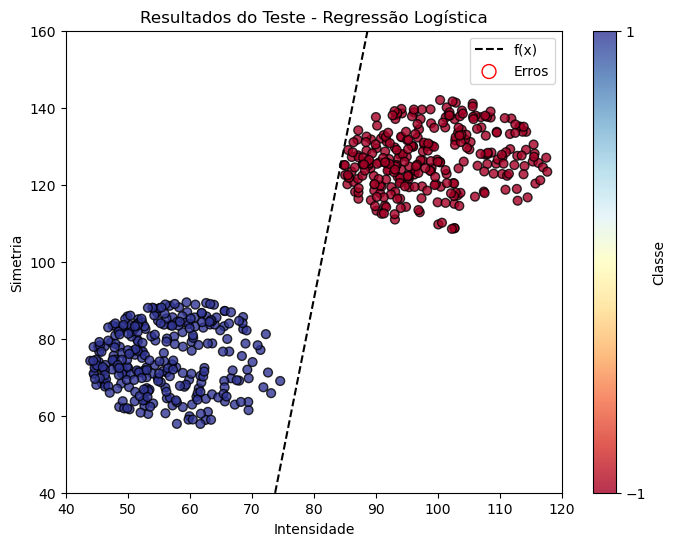

In [66]:
print("Pesos do modelo:", rlog.getW())

# Plotar resultados do teste
plot_decision_boundary(X_test, y_test, y_pred_rlog, w, 
                       title="Resultados do Teste - Regressão Logística", 
                       xlabel="Intensidade", 
                       ylabel="Simetria", 
                       color_ticks=[-1, 1], 
                       color_label="Classe",
                       xlim=(40, 120), 
                       ylim=(40, 160))

--- 
# Classificador de dígitos completo

#### Estratégia "Um Contra Todos"
Classificação Binária para cada dígito: Para cada dígito 𝑖, cria-se um classificador binário que tenta distinguir o dígito 𝑖 dos demais.

Para o dígito 0: 𝑦 = +1 para 0, y=−1 para 1, 4 e 5. <br>
Para o dígito 1: 𝑦 = +1 para 1, y=−1 para 4 e 5 (0 é removido). <br>
Para o dígito 4: 𝑦 = +1 para 4, y=−1 para 5 (0 e 1 são removidos). <br>

### Visualização de Dados

A função `plot_simetria_intensidade` carrega e visualiza os dados de simetria e intensidade para conjuntos de treino e teste.

- **Carregamento dos dados**: Os datasets reduzidos são carregados a partir de arquivos CSV.
- **Criação de Arrays**: Os arrays `X_treino`, `y_treino`, `X_teste` e `y_teste` são criados para armazenar as características (simetria e intensidade) e os rótulos das classes.
- **Visualização**: São gerados gráficos de dispersão para os conjuntos de treino e teste, com as cores representando as classes dos dados.
- **Retorno**: A função retorna os dataframes e arrays gerados para uso posterior.

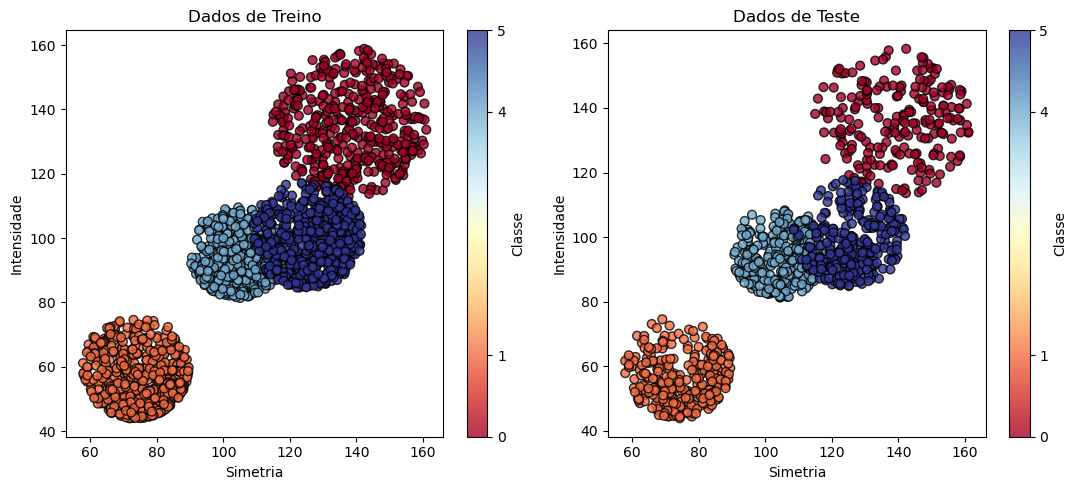

In [67]:
def plot_simetria_intensidade(caminho_treino, caminho_teste):
    
    #Carregando os dataframes ja reduzidos e separando os conjuntos de teste e treino
    df_treino = pd.read_csv(caminho_treino, delimiter=';')
    df_teste = pd.read_csv(caminho_teste, delimiter=';')
    

    X_treino = df_treino[['simetria', 'intensidade']].values
    y_treino = df_treino['label']
    
    X_teste = df_teste[['simetria', 'intensidade']].values
    y_teste = df_teste['label']

    
    # Plotar gráficos
    plt.figure(figsize=(11,5))
    
    # treino
    plt.subplot(1, 2, 1)
    scatter_treino = plt.scatter(X_treino[:, 0], X_treino[:, 1], c=y_treino, cmap=plt.cm.RdYlBu, edgecolor='k', s=40, alpha=0.8)
    plt.title('Dados de Treino')
    plt.xlabel('Simetria')
    plt.ylabel('Intensidade')
    plt.colorbar(scatter_treino, ticks=np.unique(y_treino), label='Classe')

    # teste
    plt.subplot(1, 2, 2)
    scatter_teste = plt.scatter(X_teste[:, 0], X_teste[:, 1], c=y_teste, cmap=plt.cm.RdYlBu, edgecolor='k', s=40, alpha=0.8)
    plt.title('Dados de Teste')
    plt.xlabel('Simetria')
    plt.ylabel('Intensidade')
    plt.colorbar(scatter_teste, ticks=np.unique(y_teste), label='Classe')

    plt.tight_layout()
    plt.show()
    
    return df_treino, df_teste, X_treino, X_teste, y_treino, y_teste
    
    
# Exemplo de como usar a função
df_treino, df_teste, X_treino, X_teste, y_treino, y_teste = plot_simetria_intensidade('train_redu.csv', 'test_redu.csv')

### Criação de Datasets Binários

A função `criar_dataset_binario` transforma um dataframe em um dataset binário para a classificação de dígitos. Ela permite criar datasets para um dígito específico, convertendo-o para a classe `1` e todos os outros dígitos para a classe `-1`. Também é possível excluir rótulos indesejados.

- **Parâmetros**:
  - `df`: DataFrame com os dados originais.
  - `digito`: Dígito que será convertido para a classe `1`.
  - `excluir_labels`: Lista de rótulos que devem ser excluídos do dataset.

- **Processo**:
  - O DataFrame é copiado e rótulos indesejados são excluídos.
  - O dígito selecionado é atribuído à classe `1`, e todos os outros são atribuídos à classe `-1`.

- **Criação de Datasets Binários**:
  - `df_0_x_todos_treino`: Dataset binário para o dígito `0`.
  - `df_1_x_todos_treino`: Dataset binário para o dígito `1`, excluindo o dígito `0`.
  - `df_4_x_todos_treino`: Dataset binário para o dígito `4`, excluindo os dígitos `0` e `1`.

In [68]:
def criar_dataset_binario(df, digito, excluir_labels=None):
    
    if excluir_labels is None:
        excluir_labels = []

    df_binario = df.copy()
    df_binario = df_binario[~df_binario['label'].isin(excluir_labels)]  # Excluir labels
    df_binario['label'] = df_binario['label'].apply(lambda x: 1 if x == digito else -1)
    return df_binario

In [69]:
# Criar datasets binários para treino
df_0_x_todos_treino = criar_dataset_binario(df_treino, 0)

# Criar dataset binário para o dígito 1, excluindo label 0
df_1_x_todos_treino = criar_dataset_binario(df_treino, 1, excluir_labels=[0])

# Criar dataset binário para o dígito 4, excluindo labels 0 e 1
df_4_x_todos_treino = criar_dataset_binario(df_treino, 4, excluir_labels=[0,1])


# Exibindo os datasets binários criados
print(f"\nDataset 0 x Todos - Treino:\n {df_0_x_todos_treino[df_0_x_todos_treino['label'] == 1]}")
print(f"\nDataset 1 x Todos - Treino:\n {df_1_x_todos_treino[df_1_x_todos_treino['label'] == 1]}")
print(f"\nDataset 4 x Todos - Treino:\n {df_4_x_todos_treino[df_4_x_todos_treino['label'] == 1]}")


Dataset 0 x Todos - Treino:
      label  intensidade    simetria
0        1   145.435294  148.572549
1        1   118.576471  137.113725
2        1   127.600000  134.047059
3        1   138.047059  151.003922
4        1   146.215686  122.501961
..     ...          ...         ...
420      1   135.000000  119.803922
421      1   150.913725  152.956863
422      1   139.949020  137.772549
423      1   131.176471  136.980392
424      1   114.941176  138.156863

[425 rows x 3 columns]

Dataset 1 x Todos - Treino:
       label  intensidade   simetria
425       1    44.701961  69.270588
426       1    59.850980  83.443137
427       1    48.552941  79.043137
428       1    69.435294  72.878431
429       1    51.541176  84.611765
...     ...          ...        ...
1028      1    58.639216  89.419608
1029      1    57.168627  62.164706
1030      1    70.105882  66.125490
1031      1    67.411765  63.192157
1032      1    51.674510  76.949020

[608 rows x 3 columns]

Dataset 4 x Todos - Treino:

In [70]:
# Classificador f_0: dígito 0 contra 1, 4, 5
X_treino_f0 = df_0_x_todos_treino[['intensidade', 'simetria']].values
y_treino_f0 = df_0_x_todos_treino['label'].values

# Classificador f_1: dígito 1 contra 0, 4, 5
X_treino_f1 = df_1_x_todos_treino[['intensidade', 'simetria']].values
y_treino_f1 = df_1_x_todos_treino['label'].values

# Classificador f_4: dígito 4 contra 0, 1, 5
X_treino_f4 = df_4_x_todos_treino[['intensidade', 'simetria']].values
y_treino_f4 = df_4_x_todos_treino['label'].values

In [71]:
verificar_distribuicao(X_treino_f0, "f_0")
verificar_distribuicao(X_treino_f1, "f_1")
verificar_distribuicao(X_treino_f4, "f_4")


Dataset f_0 - Coluna: intensidade
Estatística Shapiro-Wilk: 0.9586645364761353, p-value: 1.8457515024871563e-24
Desvio padrão: 28.34597315503491
Não é uma distribuição normal
---Aconselhável normalizar os dados---

Dataset f_0 - Coluna: simetria
Estatística Shapiro-Wilk: 0.9662236571311951, p-value: 3.1643293501204567e-22
Desvio padrão: 25.27451127175848
Não é uma distribuição normal
---Aconselhável normalizar os dados---

Dataset f_1 - Coluna: intensidade
Estatística Shapiro-Wilk: 0.8891103267669678, p-value: 8.610112247399316e-34
Desvio padrão: 20.92801449244284
Não é uma distribuição normal
---Aconselhável normalizar os dados---

Dataset f_1 - Coluna: simetria
Estatística Shapiro-Wilk: 0.9560656547546387, p-value: 1.2918365989060116e-22
Desvio padrão: 22.46090414675433
Não é uma distribuição normal
---Aconselhável normalizar os dados---

Dataset f_4 - Coluna: intensidade
Estatística Shapiro-Wilk: 0.9816068410873413, p-value: 6.469515201334985e-11
Desvio padrão: 7.817115803795567
Nã

### Função para Plotar a Fronteira de Decisão

A função `plot_decision_boundaries` é uma função genérica para plotar as fronteiras de decisão para todos os três tipos de modelos. A ideia é fazer com que a função trate de forma flexível as diferenças entre os modelos (Perceptron, Regressão Linear e Regressão Logística) e plotar as fronteiras de decisão adequadamente.

- **Plotagem dos Dados**: Os dados são plotados em um gráfico de dispersão, coloridos de acordo com suas classes.
- **Desenho da Fronteira de Decisão**: Calcula e plota a linha de decisão baseada nos pesos aprendidos.
- **Configuração do Gráfico**: Ajusta os eixos, títulos e legenda, e adiciona uma barra de cores para mostrar as classes preditas.

In [72]:
def plot_decision_boundaries(X, y_true, y_pred, modelos, labels, model_type):
    plt.figure(figsize=(12, 8))
    
    # Definindo cores para cada classe
    class_colors = {0: 'blue', 1: 'green', 4: 'red', 5: 'orange'}
    
    # Gráfico de dispersão dos dados
    scatter = plt.scatter(X[:, 0], X[:, 1], c=[class_colors[yi] for yi in y_pred], edgecolor='k', s=40, alpha=0.8)
    
    # Adicionar as retas de decisão para cada modelo
    x_values = np.linspace(X[:, 0].min() - 5, X[:, 0].max() + 5, 100)
    
    for modelo, label in zip(modelos, labels):
        w = modelo.getW() if model_type in ['linear_regression', 'logistic_regression'] else modelo
        bias = w[0]
        coef = w[1:]

        # Determinar a cor da linha de decisão
        class_label = int(label.split()[0][1])  # Extrair a classe do rótulo
        line_color = class_colors[class_label]
        
        if len(coef) > 1:
            y_values = - (coef[0] * x_values + bias) / coef[1]
            plt.plot(x_values, y_values, label=f'{label} Decision Boundary', linestyle='--', color=line_color)
        else:
            print(f'Não é possível plotar a fronteira de decisão para {label}. Coeficiente insuficiente.')

        # Imprimindo a função hipótese
        if model_type in ['linear_regression', 'logistic_regression']:
            print(f"Função hipótese para {label}: h(x) = {bias:.3f} + {coef[0]:.3f}*intensidade + {coef[1]:.3f}*simetria")

    if model_type == 'linear_regression':
        plt.xlim(40, 160)
        plt.ylim(50,170)
    else:
        plt.xlim(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5)
        plt.ylim(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5)
    
    # Configurando o gráfico
    plt.title(f'Resultados da Classificação por {model_type.capitalize()} com Fronteiras de Decisão')
    plt.xlabel('Intensidade')
    plt.ylabel('Simetria')
    
    # Adicionar uma barra de cores para indicar a classe predita
    handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, linestyle='') 
               for color in class_colors.values()]
    plt.legend(handles=handles, labels=list(class_colors.keys()), title='Classe Predita')
    plt.show()

### Função para Classificar Dígitos

A função `classificar_digito` classifica um dígito usando diferentes tipos de modelos (Perceptron, Regressão Linear e Regressão Logística). 

- **Entrada**: Ajusta o formato do exemplo `x` para ser um array 2D.
- **Previsão**: Dependendo do tipo de modelo:
  - **Perceptron**: Usa a função `classify` para obter previsões.
  - **Regressão Linear e Logística**: Usa o método `predict` dos modelos.
- **Classificação**: Retorna o dígito com base nas previsões para `f0`, `f1` e `f4`:
    - **Modelo `f_0`**: Classifica o dígito `0` contra os dígitos `1`, `4`, e `5`.
    - **Modelo `f_1`**: Classifica o dígito `1` contra os dígitos `4`, e `5`.
    - **Modelo `f_4`**: Classifica o dígito `4` contra os dígitos `5`.
    - 5 se nenhum dos anteriores for positivo
 
- **Erro**: Levanta um erro para tipos de modelos desconhecidos.

In [73]:
def classificar_digito(x, modelos, model_type):
    """
    Função genérica para classificar um dígito usando diferentes tipos de modelos.

    Parameters:
    x (array-like): O exemplo a ser classificado.
    modelos (list): Lista de modelos (ou coeficientes) usados para fazer a previsão.
    model_type (str): Tipo de modelo ('perceptron', 'linear_regression', 'logistic_regression').

    Returns:
    int: O dígito classificado.
    """
    # Ajustar a forma de x para ser um array 2D
    x = np.array(x).reshape(1, -1)
    
    if model_type == 'linear_regression':
        # Função de previsão para Regressão Linear
        pred_f0 = modelos[0].predict(x)
        pred_f1 = modelos[1].predict(x)
        pred_f4 = modelos[2].predict(x)
    
    elif model_type == 'logistic_regression':
        # Função de previsão para Regressão Logística
        pred_f0 = modelos[0].predict(x)
        pred_f1 = modelos[1].predict(x)
        pred_f4 = modelos[2].predict(x)
    
    else:
        raise ValueError("Tipo de modelo desconhecido. Use 'perceptron', 'linear_regression' ou 'logistic_regression'.")
    
    # Classificar o dígito com base nas previsões
    if pred_f0 > 0:
        return 0
    elif pred_f1 > 0:
        return 1
    elif pred_f4 > 0:
        return 4
    else:
        return 5

## ➞ Perceptron

### 1. Normalização dos Dados

Normalizando os dados de treinamento e teste usando a função `normalizar_manual`. Isso é feito para garantir que as características tenham a mesma escala, o que ajuda na convergência do modelo.

In [74]:
X_treino_f0_norm = normalizar_manual(X_treino_f0)
X_treino_f1_norm = normalizar_manual(X_treino_f1)
X_treino_f4_norm = normalizar_manual(X_treino_f4)

### 2. Treinamento dos Modelos Perceptron

Três modelos de Perceptron são treinados para distinguir entre o dígito de interesse e outros dígitos com a função `PLA` (Perceptron Learning Algorithm) que é usada para ajustar os pesos dos modelos.

In [75]:
it_f0, w_f0 = PLA(X_treino_f0_norm, y_treino_f0)
it_f1, w_f1 = PLA(X_treino_f1_norm, y_treino_f1, max_iter=1000)
it_f4, w_f4 = PLA(X_treino_f4_norm, y_treino_f4, max_iter=2000)

Limite máximo de iterações atingido.
Solução encontrada após 3 iterações.
Limite máximo de iterações atingido.


### 3. Previsões e Avaliação

Fazemos as previsões no conjunto de teste e avalia o desempenho do modelo usando a matriz de confusão e o relatório de classificação.

In [76]:

X_teste = normalizar_manual(df_teste[['intensidade', 'simetria']].values)

# Função para classificar um novo exemplo usando os três modelos Perceptron
def classificar_digito_perceptron(x):
    x = x.reshape(1,-1)
    pred_f0 = classify(x, w_f0)
    pred_f1 = classify(x, w_f1)
    pred_f4 = classify(x, w_f4)
    
    if pred_f0 > 0:
        return 0
    elif pred_f1 > 0:
        return 1
    elif pred_f4 > 0:
        return 4
    else:
        return 5

    
# Fazer previsões com os dados de teste normalizados
y_pred_perceptron = np.array([classificar_digito_perceptron(x) for x in X_teste])

# Avaliar o desempenho
conf_matrix_perceptron = confusion_matrix(y_teste, y_pred_perceptron)
class_report_perceptron = classification_report(y_teste, y_pred_perceptron, target_names=['0', '1', '4', '5'], zero_division=1)

print("Matriz de Confusão (Perceptron):")
print(conf_matrix_perceptron)
print("\nRelatório de Classificação (Perceptron):")
print(class_report_perceptron)

Matriz de Confusão (Perceptron):
[[218   0   0   0]
 [  0 292   0   0]
 [  0  24 199  91]
 [ 17   0   3 271]]

Relatório de Classificação (Perceptron):
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       218
           1       0.92      1.00      0.96       292
           4       0.99      0.63      0.77       314
           5       0.75      0.93      0.83       291

    accuracy                           0.88      1115
   macro avg       0.90      0.89      0.88      1115
weighted avg       0.90      0.88      0.87      1115



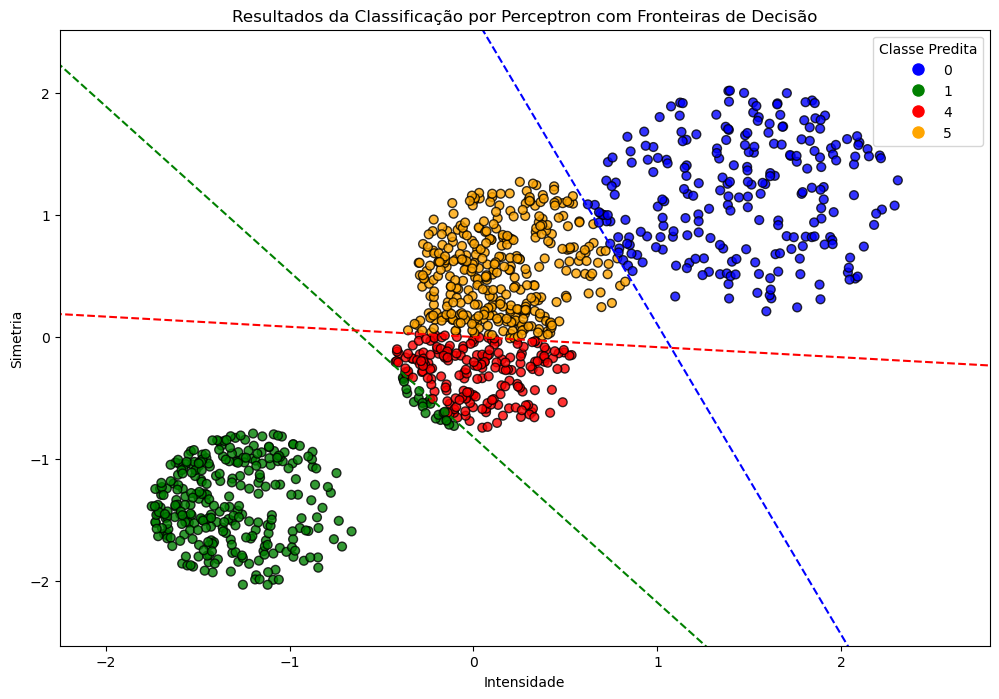

In [77]:
labels = ['f0 (0 contra todos)', 'f1 (1 contra todos)', 'f4 (4 contra todos)']
modelos = [w_f0, w_f1, w_f4]
plot_decision_boundaries(X_teste, y_teste, y_pred_perceptron, modelos, labels, model_type='perceptron')

## ➞ Regressão Linear

### 1. Treinamento dos Modelos de Regressão Linear

O código treina três modelos de regressão linear para distinguir entre dígitos específicos. Cada modelo é ajustado para classificar um dígito contra outros.

In [78]:
# Classificador f_0: dígito 0 contra 1, 4, 5
X_treino_f0 = df_0_x_todos_treino[['intensidade', 'simetria']].values
y_treino_f0 = df_0_x_todos_treino['label'].values

# Classificador f_1: dígito 1 contra  4, 5
X_treino_f1 = df_1_x_todos_treino[['intensidade', 'simetria']].values
y_treino_f1 = df_1_x_todos_treino['label'].values

# Classificador f_4: dígito 4 contra 5
X_treino_f4 = df_4_x_todos_treino[['intensidade', 'simetria']].values
y_treino_f4 = df_4_x_todos_treino['label'].values


modelo_f0 = LinearRegression()
modelo_f0.fit(X_treino_f0, y_treino_f0)

modelo_f1 = LinearRegression()
modelo_f1.fit(X_treino_f1, y_treino_f1)

modelo_f4 = LinearRegression()
modelo_f4.fit(X_treino_f4, y_treino_f4)

### 2. Classificação e Avaliação

As previsões são feitas para o conjunto de teste e o desempenho é avaliado com a matriz de confusão e o relatório de classificação.

In [79]:
X_teste = df_teste[['intensidade', 'simetria']].values
y_teste = df_teste['label'].values

# Fazer previsões
y_pred_rl = np.array([classificar_digito(x, [modelo_f0, modelo_f1, modelo_f4], 'linear_regression') for x in X_teste])

# Avaliar o desempenho
conf_matrix_lr = confusion_matrix(y_teste, y_pred_rl)
class_report_lr = classification_report(y_teste, y_pred_rl, target_names=['0', '1', '4', '5'])

print(f"\nMatriz de Confusão (Teste):\n {conf_matrix_lr}")
print(f"\nRelatório de Classificação (Teste):\n{class_report_lr}")


Matriz de Confusão (Teste):
 [[174   0   0  44]
 [  0 292   0   0]
 [  0   0 306   8]
 [  0   0  24 267]]

Relatório de Classificação (Teste):
              precision    recall  f1-score   support

           0       1.00      0.80      0.89       218
           1       1.00      1.00      1.00       292
           4       0.93      0.97      0.95       314
           5       0.84      0.92      0.88       291

    accuracy                           0.93      1115
   macro avg       0.94      0.92      0.93      1115
weighted avg       0.94      0.93      0.93      1115



Função hipótese para f0 (0 contra todos): h(x) = -2.237 + 0.025*intensidade + -0.007*simetria
Função hipótese para f1 (1 contra todos): h(x) = 3.484 + -0.032*intensidade + -0.011*simetria
Função hipótese para f4 (4 contra todos): h(x) = 7.743 + -0.005*intensidade + -0.062*simetria


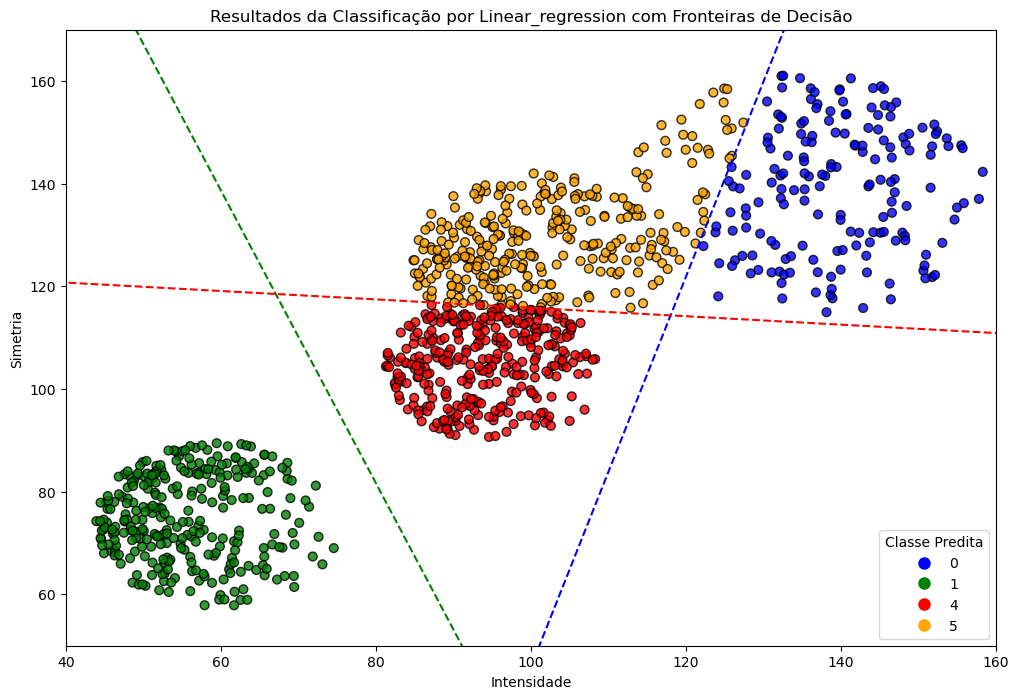

In [80]:
labels = ['f0 (0 contra todos)', 'f1 (1 contra todos)', 'f4 (4 contra todos)']
modelos = [modelo_f0, modelo_f1, modelo_f4]
plot_decision_boundaries(X_teste, y_teste, y_pred_rl, modelos, labels, model_type='linear_regression')

## ➞ Regressão Logística

### 1. Normalização dos Dados

Os dados de treino são normalizados para garantir que todas as características estejam na mesma escala. Os dados de teste também são normalizados antes da predição.

- **Função de Normalização**: `normalizar_manual` calcula a normalização dos dados.


In [81]:
# Normalizar os dados de treino
X_treino_f0_log = normalizar_manual(df_0_x_todos_treino[['intensidade', 'simetria']].values)
X_treino_f1_log = normalizar_manual(df_1_x_todos_treino[['intensidade', 'simetria']].values)
X_treino_f4_log = df_4_x_todos_treino[['intensidade', 'simetria']].values # Em df_4_x_todos os dados estão mais equilibrados por isso nao normalizei

y_treino_f0_log = df_0_x_todos_treino['label'].values
y_treino_f1_log = df_1_x_todos_treino['label'].values
y_treino_f4_log = df_4_x_todos_treino['label'].values


#eta é a taxa de aprendizado, que pode ser mdoficiada de acordo com a necessidade
modelo_f0_log = LogisticRegression(eta=0.01, tmax=1000) 
modelo_f1_log = LogisticRegression(eta=0.001, tmax=1000) 
modelo_f4_log = LogisticRegression(eta=0.001, tmax=1000)

modelo_f0_log.fit(X_treino_f0_log, y_treino_f0_log)
modelo_f1_log.fit(X_treino_f1_log, y_treino_f1_log)
modelo_f4_log.fit(X_treino_f4_log, y_treino_f4_log)

C:\Users\Mariana\AppData\Local\Temp\ipykernel_6512\2483756709.py:21: RuntimeWarning: overflow encountered in exp
  probs = 1 / (1 + np.exp(-z))


### 2. Predição e Avaliação

- **Predição**: Utiliza os modelos treinados para prever os rótulos dos dados de teste.
- **Avaliação**: A performance dos modelos é avaliada utilizando a matriz de confusão e o relatório de classificação.


In [82]:
X_teste = normalizar_manual(df_teste[['intensidade', 'simetria']].values)

# Adicionar bias ao conjunto de teste (somente para visualização se necessário)
X_teste_bias = np.c_[np.ones((X_teste.shape[0], 1)), X_teste]

# Lista de modelos para Regressão Logística
modelos_rlog = [modelo_f0_log, modelo_f1_log, modelo_f4_log]

# Classificar todos os exemplos usando Regressão Logística
y_pred = np.array([classificar_digito(x, modelos_rlog, 'logistic_regression') for x in X_teste_bias])

Função hipótese para f0 (0 contra todos): h(x) = -7.931 + 3.907*intensidade + 2.902*simetria
Função hipótese para f1 (1 contra todos): h(x) = -0.730 + -0.731*intensidade + -0.667*simetria
Função hipótese para f4 (4 contra todos): h(x) = 0.000 + -2.311*intensidade + -10.633*simetria


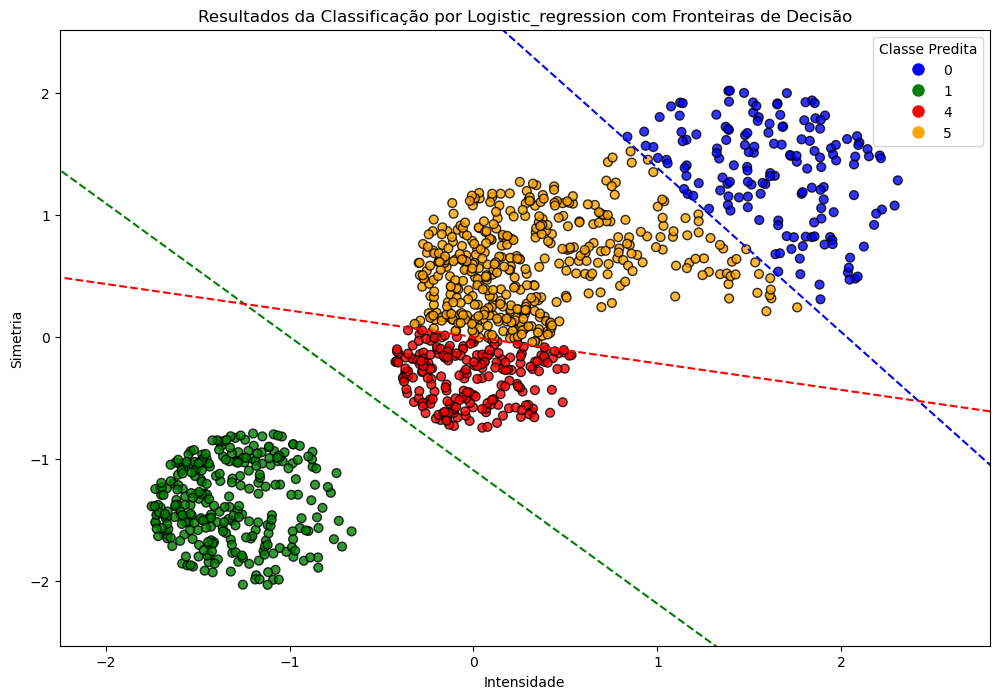

In [83]:
labels = ['f0 (0 contra todos)', 'f1 (1 contra todos)', 'f4 (4 contra todos)']
plot_decision_boundaries(X_teste, y_teste, y_pred, modelos_rlog, labels, model_type='logistic_regression')